In [1]:
# Importing all important Libraries

import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Reading And Analysis

In [2]:
df = pd.read_csv('data.csv', encoding='latin-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Checking for Null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [7]:
# As we cannot replace Null values, thats why just droping it.

df.dropna(axis = 0, inplace = True)
print(df.shape)  

(406829, 8)


In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<AxesSubplot:>

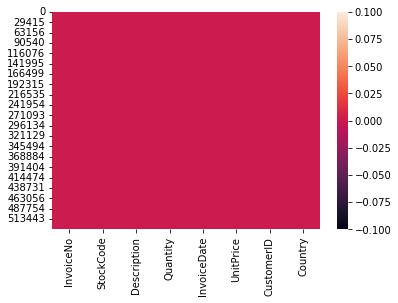

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Deleting Negative Quantity values

df= df[df['Quantity']>0]
df.shape

(397924, 8)

In [12]:
# Calculate total_amount of money for each order

df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## RFM Analysis

#### Recency

In [14]:
df1=df.copy()

In [15]:
###Taking a reference date to calculate the gap between this reference date and the last purchase date of each customer.
# The gap can be referred as the recency of each customer

df1.InvoiceDate = pd.to_datetime(df1.InvoiceDate)
reference_date = df1.InvoiceDate.max() + datetime.timedelta(days = 1)

df1['days_from_last_purchase'] = (reference_date - df1.InvoiceDate).astype('timedelta64[D]')

lastpurchase_day = df1[['CustomerID','days_from_last_purchase']].groupby('CustomerID').min().reset_index()

In [16]:
lastpurchase_day.rename(columns={'days_from_last_purchase':'recency'}, inplace=True)

In [17]:
lastpurchase_day

,CustomerID,recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0
...,...,...
4334,18280.0,278.0
4335,18281.0,181.0
4336,18282.0,8.0
4337,18283.0,4.0


#### Frequency

In [18]:
###Calculate number of orders purchased by each customer

temp = df1.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


#### Monetary

In [19]:
###Total amount of money spent per customer
money = df1[['CustomerID','Total_Price']].groupby('CustomerID').sum().reset_index()
money.rename(columns = {'Total_Price':'monetary'}, inplace = True) 
money.head()

,CustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## RFM information for each customer.

In [20]:
rfm = lastpurchase_day.merge(frequency_df,on='CustomerID').merge(money,on='CustomerID')
rfm.set_index('CustomerID',inplace=True)
rfm.head(5)

,recency,Frequency,monetary
CustomerID,,,
12346.0,326.0,1,77183.60
12347.0,2.0,7,4310.00
12348.0,75.0,4,1797.24
12349.0,19.0,1,1757.55
12350.0,310.0,1,334.40


In [21]:
rfm.shape

(4339, 3)

In [22]:
# Applying Standard Scaler to reduce the dimensions

std = StandardScaler()
rfm_scaled = std.fit_transform(rfm)

## K-Means Clustering

In [23]:
# First we are finding the optimal k value using elbow method

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

In [25]:
# Plotting wcss and k values

Text(0, 0.5, 'Wcss values')

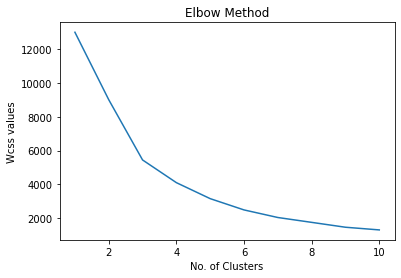

In [26]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss values')

from above graph we found an elbow at k=3, hence optimal k value is 3

In [27]:
#Fitting data in k-means Method

kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_predict = kmeans_model.fit_predict(rfm_scaled)

In [28]:
y_predict

array([0, 2, 2, ..., 2, 2, 2])

In [29]:
# Calculating Silhouette score

print(silhouette_score(rfm_scaled, y_predict))

0.5943372749085692


In [30]:
rfm.head()

,recency,Frequency,monetary
CustomerID,,,
12346.0,326.0,1,77183.60
12347.0,2.0,7,4310.00
12348.0,75.0,4,1797.24
12349.0,19.0,1,1757.55
12350.0,310.0,1,334.40


In [31]:
# Adding cluster column in rfm dataframe

rfm['Cluster'] = kmeans_model.labels_

In [32]:
rfm.head()

,recency,Frequency,monetary,Cluster
CustomerID,,,,
12346.0,326.0,1,77183.60,0
12347.0,2.0,7,4310.00,2
12348.0,75.0,4,1797.24,2
12349.0,19.0,1,1757.55,2
12350.0,310.0,1,334.40,0


### Plotting For all the 3 Clusters

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='recency'>

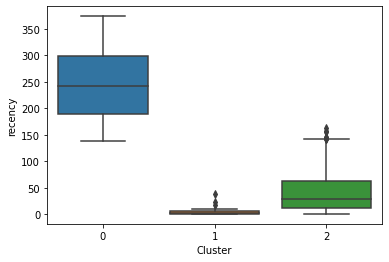

In [33]:
sns.boxplot(rfm.Cluster,rfm.recency)

As seen above, cluster 0 have high recency rate which is not good

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

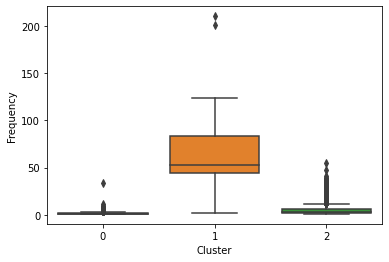

In [34]:
sns.boxplot(rfm.Cluster,rfm.Frequency)

As seen above, Cluster 0 have low frequency, hence low frequency with high recency ie. they are our bad customers

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='monetary'>

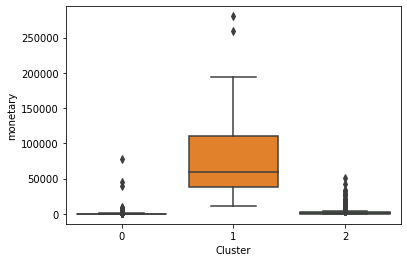

In [35]:
sns.boxplot(rfm.Cluster,rfm.monetary)

As seen above, Cluster 1 have high Monetary rate with high frequency, hence they are our best customers who spends higher.

1. 1st position =  Cluster 1
2. 2nd position =  Cluster 2
3. 3rd position =  Cluster 0